2023-10-28 23:43:01.637614: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-28 23:43:02.204742: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-28 23:43:02.204771: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-28 23:43:02.207437: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-28 23:43:02.470873: I tensorflow/core/platform/cpu_feature_g

Found 225 images belonging to 15 classes.
Found 90 images belonging to 15 classes.


2023-10-28 23:43:05.913951: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-28 23:43:05.953920: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-28 23:43:05.953956: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-28 23:43:05.955679: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-28 23:43:05.955708: I tensorflow/compile

Epoch 1/200


2023-10-28 23:43:14.042400: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-10-28 23:43:32.932739: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fac4c01be70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-28 23:43:32.932769: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2023-10-28 23:43:32.942097: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-28 23:43:33.029099: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 [==============================] - ETA: 0s - loss: 4.2912 - accuracy: 0.0533

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 48s 3s/step - loss: 4.2912 - accuracy: 0.0533 - val_loss: 31.5510 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 2/200
8/8 [==============================] - 10s 1s/step - loss: 4.1982 - accuracy: 0.0756 - val_loss: 36.6014 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 3/200
8/8 [==============================] - 11s 2s/step - loss: 4.1479 - accuracy: 0.0756 - val_loss: 27.5180 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 4/200
8/8 [==============================] - 11s 2s/step - loss: 4.0357 - accuracy: 0.0889 - val_loss: 18.8049 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 5/200
8/8 [==============================] - 10s 1s/step - loss: 3.9592 - accuracy: 0.1022 - val_loss: 19.6845 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 6/200
8/8 [==============================] - 10s 1s/step - loss: 3.8463 - accuracy: 0.1644 - val_loss: 20.4046 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 7/200
8/8 [==============================] - 10s 1s/step - loss: 3.6827 - accuracy: 0.16

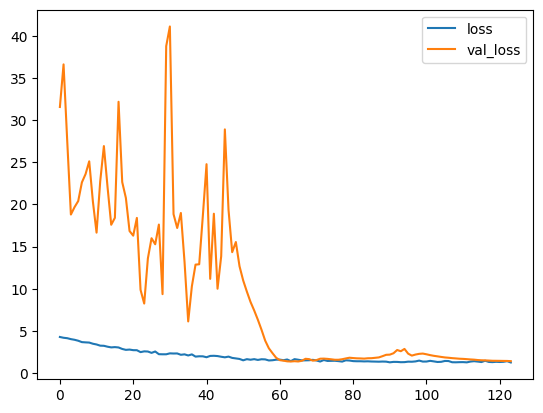

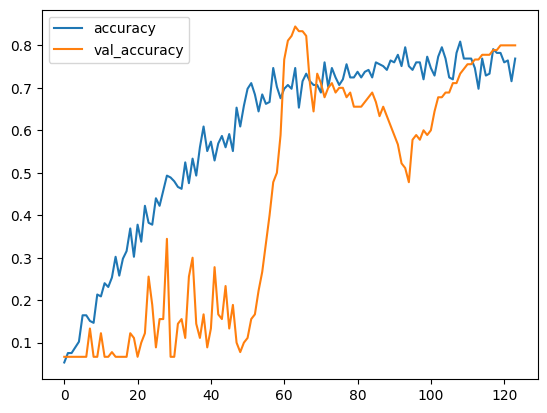

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf

N_CLASSES = 15
IMAGE_SIZE = 500
BATCH_SIZE = 32

train_data_augmer = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.0,
    zoom_range=0.2,
    rotation_range=25,
    height_shift_range=0.2,
    width_shift_range=0.2,
    # channel_shift_range=0.1,
    brightness_range=[0.85,1.15],
)
valid_data_augmer = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.0
)

train_generator = train_data_augmer.flow_from_directory(
    directory="compe/train",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
valid_generator = valid_data_augmer.flow_from_directory(
    directory="compe/val",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

def step_decay(epoch):
    lr = 0.001
    if(epoch >= 50):
        lr /= 10
    if(epoch >= 100):
        lr /= 40
    return lr

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        patience=60,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ModelCheckpoint(
        'data/temp/road_sign_sequential_{epoch:03d}_{val_loss:.4f}.h5',
        save_best_only=True
    ),
    # tf.keras.callbacks.TensorBoard(
    #     log_dir='logs',
    #     histogram_freq=1
    # ),
    tf.keras.callbacks.LearningRateScheduler(step_decay),
]



from tensorflow.keras.layers import Dense, Dropout, Conv2D, GlobalAveragePooling2D, MaxPooling2D, Flatten, Input, BatchNormalization, Resizing, Rescaling
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import VGG16

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
for layer in vgg_model.layers:
    layer.trainable = False

x = vgg_model.output
x = Conv2D(1024, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(1024, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(1024, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = BatchNormalization()(x) 
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.5)(x)
outputs = Dense(N_CLASSES, activation='softmax')(x)

EPOCHS = 200

model = tf.keras.Model(inputs=vgg_model.input, outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_generator, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1, validation_data=valid_generator, callbacks=callbacks)
model.save('model.h5')



score = model.evaluate(valid_generator, verbose='0')
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# !tensorboard --logdir logs/fit



import pandas as pd

hist_df = pd.DataFrame(history.history)
hist_df[['loss', 'val_loss']].plot()
hist_df[['accuracy', 'val_accuracy']].plot()

print(model.summary())

In [2]:
import numpy as np
import tensorflow as tf
import pathlib
import sklearn.metrics

def _main():
    idg = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1.0/255.0
	# 学習時のスケールと合わせる必要がある
    )
    gen_validation = idg.flow_from_directory(
        directory='compe/val',
        target_size=(500, 500),
        batch_size=32,
        shuffle=False
    )

    # 学習済みのモデルをロード
    model = tf.keras.models.load_model('model.h5')
    preds = model.predict(gen_validation, steps=len(gen_validation))
    # 検証データは以下の15クラスが6枚ずつ
    labels = [
        '01_stop',
        '02_dontEntry',
        '03_max_20',
        '04_max_30',
        '05_max_40',
        '06_max_50',
        '07_donotParking',
        '08_donotParkingStopping',
        '09_pedestrian',
        '10_bicycleAndPedestrianOnly',
        '11_pedestrianOnly',
        '12_oneWay',
        '13_goOnlyinDirectionOfArrow',
        '14_schoolRoad',
        '15_end'
    ]
    # 正解ラベルの作成
    y_label = []
    for label in labels:
        for i in range(6):
            y_label.append(label)

    # 推論ラベルの作成
    y_preds = []
    for p in preds:
        # 確信度が最大の値を推論結果とみなす
        label_idx = p.argmax()
        y_preds.append(labels[label_idx])
    
    # 混合行列を取得
    val_mat = sklearn.metrics.confusion_matrix(y_label, y_preds, labels=labels)
    rec_score = sklearn.metrics.recall_score(y_label, y_preds, average=None)
    print('再現率： ',rec_score)

    pre_score = sklearn.metrics.precision_score(y_label, y_preds, average=None)
    print('適合率： ', pre_score)
    print()

    f1_score = sklearn.metrics.f1_score(y_label, y_preds, average=None)
    print('F値   ： ', f1_score)

    rec_score_avg = sklearn.metrics.recall_score(y_label, y_preds, average="macro")
    print('再現率(平均)： ', rec_score_avg)
    pre_score_avg = sklearn.metrics.precision_score(y_label, y_preds, average="macro")
    print('適合率(平均)： ', pre_score_avg)
    f1_score_avg = sklearn.metrics.f1_score(y_label, y_preds, average="macro")
    print('F値(平均)   ： ', f1_score_avg)
    print()

    acc_score = sklearn.metrics.accuracy_score(y_label, y_preds)
    print('正解率： ', acc_score)

if __name__ == '__main__':
    _main()


Found 90 images belonging to 15 classes.
3/3 [==============================] - 2s 581ms/step
再現率：  [0.83333333 1.         1.         0.83333333 0.83333333 0.5
 0.66666667 0.66666667 0.83333333 1.         1.         1.
 0.83333333 0.83333333 0.83333333]
適合率：  [0.83333333 0.75       1.         1.         0.71428571 0.75
 0.66666667 0.8        0.83333333 0.66666667 1.         1.
 1.         1.         0.83333333]

F値   ：  [0.83333333 0.85714286 1.         0.90909091 0.76923077 0.6
 0.66666667 0.72727273 0.83333333 0.8        1.         1.
 0.90909091 0.90909091 0.83333333]
再現率(平均)：  0.8444444444444447
適合率(平均)：  0.8565079365079366
F値(平均)   ：  0.8431723831723831

正解率：  0.8444444444444444


In [3]:
test_data_augmer = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255.0
)

test_generator = test_data_augmer.flow_from_directory(
    directory="Test_images",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
score = model.evaluate(test_generator, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Found 403 images belonging to 15 classes.
13/13 [==============================] - 15s 1s/step - loss: 2.6557 - accuracy: 0.3747
Test loss: 2.6556684970855713
Test accuracy: 0.37468981742858887


0.5024752616882324
0.5668317079544067
0.5891088843345642